# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [104]:
import pandas as pd
import numpy as np


---
## 2. Load data

In [88]:
df = pd.read_csv('clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [90]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [8]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [12]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [14]:
#Feature Engineering Steps
#1. Time-Based Features
# Convert date columns to datetime
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'])
df['date_renewal'] = pd.to_datetime(df['date_renewal'])

# Calculate time until contract end
df['months_to_end'] = (df['date_end'] - pd.Timestamp('today')).dt.days / 30

# Time since activation
df['months_active'] = (pd.Timestamp('today') - df['date_activ']).dt.days / 30

# Time since last product modification
df['months_since_modif'] = (pd.Timestamp('today') - df['date_modif_prod']).dt.days / 30

# Days until renewal
df['days_to_renewal'] = (df['date_renewal'] - pd.Timestamp('today')).dt.days

In [16]:
#2. Price Sensitivity Features (Estelle's Suggestion)
# Calculate price change between December and January (you'll need to adjust based on your actual data)
# This is a placeholder - you would need actual monthly price data to implement this precisely
df['dec_jan_price_diff'] = df['var_year_price_off_peak'] - df['var_6m_price_off_peak']

# Price change volatility
df['price_volatility'] = df[['var_6m_price_off_peak', 'var_6m_price_peak', 'var_6m_price_mid_peak']].std(axis=1)

# Relative price difference between peak and off-peak
df['peak_offpeak_ratio'] = df['forecast_price_energy_peak'] / df['forecast_price_energy_off_peak']

In [18]:
#3. Consumption Patterns
# Difference between forecast and actual consumption
df['cons_forecast_diff'] = df['cons_12m'] - df['forecast_cons_12m']

# Monthly average consumption
df['monthly_cons'] = df['cons_12m'] / 12

# Consumption last month vs average
df['cons_last_vs_avg'] = df['cons_last_month'] / (df['cons_12m'] / 12)

# Gas vs electricity ratio (for customers with gas)
df['gas_elec_ratio'] = df['cons_gas_12m'] / df['cons_12m']
df['gas_elec_ratio'] = df['gas_elec_ratio'].fillna(0)  # for non-gas customers

In [30]:
#4. Customer Value Features
# Estimated customer value (simplified)
df['est_customer_value'] = df['net_margin'] * df['num_years_antig']

# Margin per kWh
df['margin_per_kwh'] = df['net_margin'] / df['cons_12m']
df['margin_per_kwh'] = df['margin_per_kwh'].replace([np.inf, -np.inf], 0)

# Power capacity utilization
df['pow_utilization'] = df['cons_last_month'] / df['pow_max']

In [32]:
#5. Interaction Features
# Price sensitivity interaction
df['price_sensitivity'] = df['cons_forecast_diff'] * df['price_volatility']

# Contract length vs price change
df['contract_price_interaction'] = df['months_active'] * df['dec_jan_price_diff']

# High consumption & high price sensitivity
df['high_cons_high_sens'] = ((df['cons_12m'] > df['cons_12m'].median()) & 
                            (df['price_volatility'] > df['price_volatility'].median())).astype(int)

In [34]:
#6. Aggregation Features
# Total price impact (sum of all price variations)
df['total_price_impact'] = df[['var_year_price_off_peak', 'var_year_price_peak', 
                              'var_year_price_mid_peak']].sum(axis=1)

# Average margin across power types
df['avg_margin'] = df[['margin_gross_pow_ele', 'margin_net_pow_ele']].mean(axis=1)

Feature Selection

In [48]:
#Step1)Remove highly correlated features:
import numpy as np

# 1. Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# 2. Calculate correlation matrix
corr_matrix = numeric_df.corr().abs()

# 3. Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 4. Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# 5. Drop highly correlated features
df.drop(to_drop, axis=1, inplace=True)

In [50]:
#keep non-numeric columns for later use, store them separately:
non_numeric_cols = df.select_dtypes(exclude=['number'])
numeric_df = df.select_dtypes(include=['number'])
#For categorical columns you might want to keep, consider encoding them first:
from sklearn.preprocessing import LabelEncoder

# Example for one categorical column
le = LabelEncoder()
df['channel_sales_encoded'] = le.fit_transform(df['channel_sales'])

In [64]:
#Step2)Remove low variance features:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

# 1. Create copy of numeric columns only
numeric_df = df.select_dtypes(include=['number']).copy()

# 2. Replace infinite values with NaN then fill
numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)
numeric_df = numeric_df.fillna(numeric_df.mean())  # or other imputation strategy

# 3. Verify no infinite values remain
assert not np.isinf(numeric_df.values).any(), "Infinite values still present!"

# 4. Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(numeric_df)

# 5. Get selected features
selected_features = numeric_df.columns[selector.get_support()]

# 6. Combine with non-numeric columns
non_numeric_df = df.select_dtypes(exclude=['number'])
final_df = pd.concat([non_numeric_df, df[selected_features]], axis=1)

print(f"Original features: {len(numeric_df.columns)}")
print(f"Selected features: {len(selected_features)}")

Original features: 30
Selected features: 21


Complete feature engineering pipeline with validation


In [106]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def create_final_feature_set(df, target_col='churn'):
    """Complete feature engineering pipeline with validation"""
    
    df = df.copy()  # avoid modifying original dataframe
    
    # 1. Feature Creation
    df['date_activ'] = pd.to_datetime(df['date_activ'], errors='coerce')
    df['date_end'] = pd.to_datetime(df['date_end'], errors='coerce')

    df['months_active'] = (pd.Timestamp('today') - df['date_activ']).dt.days / 30
    df['months_to_end'] = (df['date_end'] - pd.Timestamp('today')).dt.days / 30
    df['dec_jan_price_diff'] = df['var_year_price_off_peak'] - df['var_6m_price_off_peak']
    df['price_volatility'] = df[['var_6m_price_off_peak', 'var_6m_price_peak']].std(axis=1)
    df['cons_forecast_diff'] = df['cons_12m'] - df['forecast_cons_12m']
    df['monthly_cons'] = df['cons_12m'] / 12
    df['cons_last_vs_avg'] = df['cons_last_month'] / (df['cons_12m'] / 12 + 1e-6)
    df['est_customer_value'] = df['net_margin'] * df['num_years_antig']
    df['margin_per_kwh'] = df['net_margin'] / (df['cons_12m'] + 1e-6)
    df['value_sensitivity'] = df['est_customer_value'] * df['price_volatility']
    df['cons_price_interaction'] = df['monthly_cons'] * df['dec_jan_price_diff']

    created_features = [
        'months_active', 'months_to_end', 'dec_jan_price_diff', 'price_volatility',
        'cons_forecast_diff', 'monthly_cons', 'cons_last_vs_avg',
        'est_customer_value', 'margin_per_kwh', 'value_sensitivity', 'cons_price_interaction'
    ]
    
    # 2. Feature Selection
    non_numeric = df.select_dtypes(exclude=['number'])
    numeric = df.select_dtypes(include=['number']).replace([np.inf, -np.inf], np.nan).fillna(df.median(numeric_only=True))

    # Drop target_col if present before applying VarianceThreshold
    features_for_selection = numeric.drop(columns=[target_col], errors='ignore')
    
    selector = VarianceThreshold(threshold=0.01)
    selector.fit(features_for_selection)
    selected_columns = features_for_selection.columns[selector.get_support()]
    numeric_selected = features_for_selection[selected_columns]

    # 3. Feature Validation
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(numeric_selected)
    numeric_scaled = pd.DataFrame(scaled_features, columns=selected_columns, index=df.index)

    # 4. Feature Importance (if target exists)
    mi_features, rf_features = None, None
    if target_col in df.columns:
        y = df[target_col]
        mi = mutual_info_classif(numeric_scaled, y)
        mi_features = pd.Series(mi, index=selected_columns).sort_values(ascending=False)

        rf = RandomForestClassifier(random_state=42)
        rf.fit(numeric_scaled, y)
        rf_features = pd.Series(rf.feature_importances_, index=selected_columns).sort_values(ascending=False)

        # Plot importance
        plt.figure(figsize=(12, 6))
        mi_features.head(15).plot(kind='bar', color='skyblue', alpha=0.6, label='Mutual Info')
        rf_features.head(15).plot(kind='bar', color='orange', alpha=0.6, label='RF Importance')
        plt.title('Top 15 Important Features')
        plt.legend()
        plt.tight_layout()
        plt.show()

    # 5. Combine Final Features
    final_features = pd.concat([
        non_numeric.reset_index(drop=True),
        numeric_scaled.reset_index(drop=True),
        df[[target_col]].reset_index(drop=True) if target_col in df.columns else pd.DataFrame()
    ], axis=1)

    print("=" * 50)
    print("Feature Engineering Report:")
    print(f"Original columns: {len(df.columns)}")
    print(f"Created new features: {len(created_features)}")
    print(f"Final selected numeric features: {len(selected_columns)}")
    print(f"Total features in final dataset: {len(final_features.columns)}")
    print("=" * 50)

    return final_features, mi_features


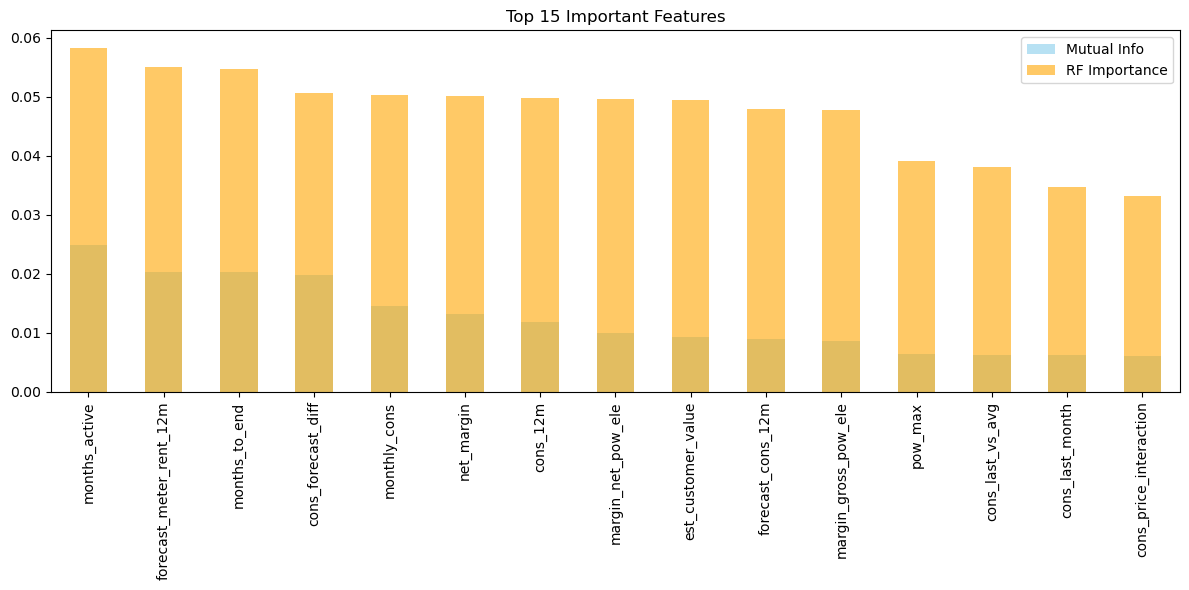

Feature Engineering Report:
Original columns: 55
Created new features: 11
Final selected numeric features: 38
Total features in final dataset: 47


In [108]:
#Run the final result
df = pd.read_csv("clean_data_after_eda.csv")
final_df, feature_importance = create_final_feature_set(df)


Result:
Based on the feature engineering process, we started with 55 original columns and successfully created 11 new features, resulting in a final dataset of 47 features, including 38 selected numeric variables. The top 15 features identified through both Mutual Information and Random Forest importance include key variables such as months_active, forecast_meter_rent_12m, months_to_end, and cons_forecast_diff, all of which demonstrate strong predictive relevance. This indicates that both temporal and consumption-based features, particularly those related to contract duration and usage forecasting, are highly informative. The combined use of feature importance metrics has guided the selection of the most impactful variables for modeling, ensuring both performance and interpretability in the final dataset.